In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg_train = ImageDataGenerator(rescale=1./255,
                         #rotation_range=20,
                         #width_shift_range=.15,
                         #height_shift_range=.15,
                         #horizontal_flip=True,
                         #zoom_range=[0,0.2]
                        )
idg_validation_test = ImageDataGenerator(rescale=1./255)
path ='/Users/luizeduardosantos/Documents/Turing/projeto-trainee-cv/'
batch_size = 32 
img_size = (256,256)

train_dir = path + 'train'
train_images = idg_train.flow_from_directory(batch_size=batch_size,
                                             directory=train_dir,
                                             #color_mode = 'grayscale'
                                             target_size = img_size,
                                             class_mode='categorical')

validation_dir = path + 'validation'
val_images = idg_validation_test.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     #color_mode = 'grayscale',
                                                     target_size= img_size,
                                                     class_mode='categorical')

batch_size = 1
test_dir = path + 'test'
test_images = idg_validation_test.flow_from_directory(batch_size=batch_size,
                                                      directory=validation_dir,
                                                      #color_mode = 'grayscale'
                                                      target_size= img_size,
                                                      class_mode='categorical')


Found 1464 images belonging to 3 classes.
Found 183 images belonging to 3 classes.
Found 183 images belonging to 3 classes.


In [10]:
model2 = 1
model2 = Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256 ,3)))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.Flatten())

model2.add(layers.Dense(32, activation= 'relu'))
model2.add(layers.Dense(8, activation= 'relu'))
model2.add(layers.Dense(3, activation= 'softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

Epoch 1/15
46/46 [==============================] - 46s 991ms/step - loss: 1.1799 - accuracy: 0.3620 - val_loss: 0.9913 - val_accuracy: 0.4863
Epoch 2/15
46/46 [==============================] - 48s 1s/step - loss: 1.0100 - accuracy: 0.4884 - val_loss: 1.0641 - val_accuracy: 0.4262
Epoch 3/15
46/46 [==============================] - 50s 1s/step - loss: 0.9050 - accuracy: 0.5533 - val_loss: 0.8188 - val_accuracy: 0.6120
Epoch 4/15
46/46 [==============================] - 49s 1s/step - loss: 0.8349 - accuracy: 0.5936 - val_loss: 0.7774 - val_accuracy: 0.6175
Epoch 5/15
46/46 [==============================] - 49s 1s/step - loss: 0.7798 - accuracy: 0.6189 - val_loss: 0.7769 - val_accuracy: 0.6011
Epoch 6/15
46/46 [==============================] - 49s 1s/step - loss: 0.7417 - accuracy: 0.6407 - val_loss: 0.7835 - val_accuracy: 0.6175
Epoch 7/15
46/46 [==============================] - 49s 1s/step - loss: 0.7186 - accuracy: 0.6646 - val_loss: 0.7402 - val_accuracy: 0.6995
Epoch 8/15
46/46 

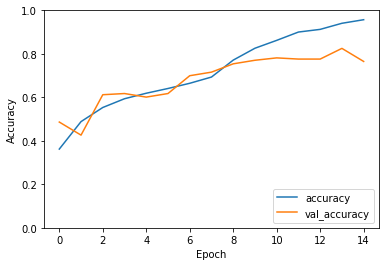

In [11]:
model2.compile(optimizer='adam',
              loss= CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model2.fit(train_images, epochs=15,validation_data = val_images)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')



In [12]:
model2.evaluate(test_images)

183/183 [==============================] - 2s 11ms/step - loss: 0.9004 - accuracy: 0.7650


[0.9004044532775879, 0.7650273442268372]

In [13]:
model2.save('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/')

INFO:tensorflow:Assets written to: /Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/assets
